In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data  
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 80
BATCH_SIZE = 5000
EPOCH = 2

# Load the input tensor we saved in earlier practice

In [3]:
train_x = torch.load('C:/Users/ADMIN/Desktop/train_x.tensor')  
train_y = torch.load('C:/Users/ADMIN/Desktop/train_y.tensor')  

In [4]:
train_x = train_x.type(torch.FloatTensor)

In [5]:
train_x.shape

torch.Size([25000, 80, 80, 3])

In [6]:
train_y = train_y.type(torch.LongTensor)

In [7]:
train_y.shape

torch.Size([25000, 1])

In [8]:
train_y = train_y.view(25000)

In [9]:
train_y.shape

torch.Size([25000])

# Expand input tensor from 80x80x3 to 19200

In [10]:
train_x = train_x.view(25000, 19200)

In [11]:
train_x.shape

torch.Size([25000, 19200])

# Build tensor data set and data loader 

In [12]:
torch_dataset = Data.TensorDataset(data_tensor=train_x, target_tensor=train_y)

In [13]:
loader = Data.DataLoader(
    dataset=torch_dataset,     # torch TensorDataset format
    batch_size=BATCH_SIZE,       # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

# Define and build MLP

In [14]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [15]:
net = Net(19200 , 20000, 2)

In [16]:
net

Net(
  (hidden): Linear(in_features=19200, out_features=20000)
  (predict): Linear(in_features=20000, out_features=2)
)

In [17]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)

In [18]:
loss_func = torch.nn.CrossEntropyLoss()

# Test one training epoc

In [20]:
for step, (batch_x, batch_y) in enumerate(loader): 
    break

In [21]:
print(step, batch_x.shape, batch_y.shape)

0 torch.Size([5000, 19200]) torch.Size([5000])


In [22]:
batch_x = Variable(batch_x)
batch_y = Variable(batch_y)

In [23]:
out = net(batch_x)

In [24]:
out

Variable containing:
-1.1651e+01 -2.0824e+00
-4.7872e+01  2.2719e+00
-3.6288e+01  1.3775e+01
           ⋮            
-5.4797e+01 -1.2937e+01
-4.1057e+01  3.5873e+00
-2.3500e+01 -4.5755e+00
[torch.FloatTensor of size 5000x2]

In [26]:
loss = loss_func(out, batch_y)
print(loss)

Variable containing:
 26.4372
[torch.FloatTensor of size 1]



In [27]:
loss.data[0]

26.43722152709961

# Train the MLP 

In [28]:
losslst = []
for epoch in range(EPOCH):   # train entire dataset EPOCH times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        #print('batch_x = ', batch_x.shape, 'batch_y = ', batch_y.shape)
        batch_x = Variable(batch_x)
        batch_y = Variable(batch_y)
        out = net(batch_x)
        #print('out = ', out.shape)
        loss = loss_func(out, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('Epoch: ', epoch, '| step: ', step, '| train loss: ', loss.data[0])
        losslst.append(loss.data[0])
    epoch = epoch + 1

Epoch:  0 | step:  0 | train loss:  25.905323028564453
Epoch:  0 | step:  1 | train loss:  30412206.0
Epoch:  0 | step:  2 | train loss:  0.9540435671806335
Epoch:  0 | step:  3 | train loss:  498.2665100097656
Epoch:  0 | step:  4 | train loss:  0.7538394331932068
Epoch:  1 | step:  0 | train loss:  0.7078912258148193
Epoch:  1 | step:  1 | train loss:  0.6863288283348083
Epoch:  1 | step:  2 | train loss:  1.8385869264602661
Epoch:  1 | step:  3 | train loss:  9.007325172424316
Epoch:  1 | step:  4 | train loss:  55.01739501953125


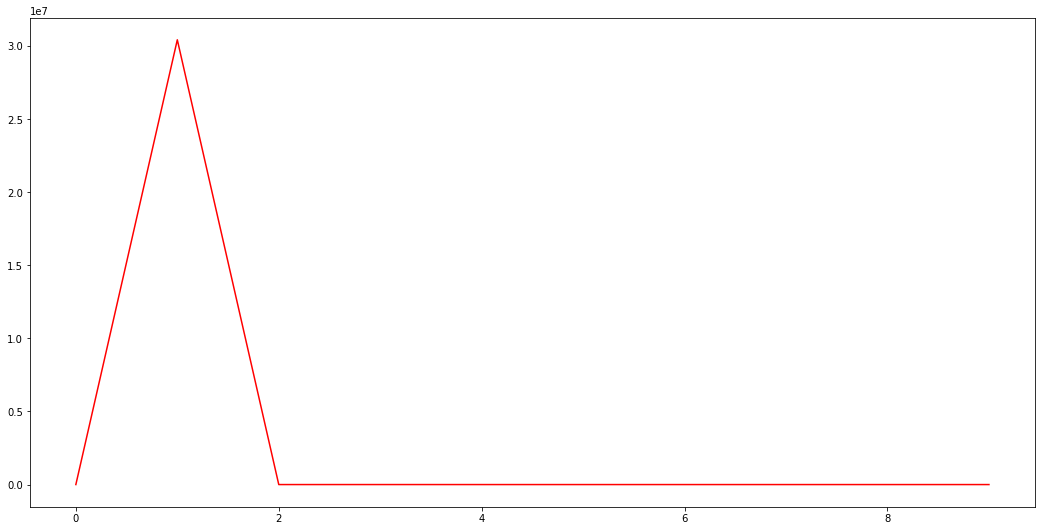

In [29]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.plot(losslst, color = 'red')
plt.show()